# Heart Disease Uci
The Dataset is available at
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import pandas as pd
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.svm import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.gaussian_process import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.tree import *
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

One of the limitationfor the dataset is that it only contains 303 rows. Hence the result of the dataset, might not be generalised.  
The rest analysis has been done as below.

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age
- sex ( 1 = male, 0 = female )
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **target 0(Not Present), 1(Present)**

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Analysis

In [4]:
def analysis(data_frame,label):
    c = data_frame["target"].groupby(data_frame[label]).count().values
    l = data_frame["target"].groupby(data_frame[label]).count().index
    s = data_frame["target"].groupby(data_frame[label]).sum().values
    p = s/c 
    return pd.DataFrame({
        "Sum_of_targeted":s,
        "Total_count":c,
        "percentage":p
    },index = l)

We start by comparing the total data points for each label, to analyse what percetage of them have heart disease

In [5]:
analysis(df,"sex")

,Sum_of_targeted,Total_count,percentage
sex,,,
0,72,96,0.750000
1,93,207,0.449275


As we can see the number of males are more as compared to females, hence the dataset is imbalanced

In [6]:
analysis(df,"cp")

,Sum_of_targeted,Total_count,percentage
cp,,,
0,39,143,0.272727
1,41,50,0.820000
2,69,87,0.793103
3,16,23,0.695652


People with chest pains are generally at a higher risk of heart disease

In [7]:
analysis(df,"fbs")

,Sum_of_targeted,Total_count,percentage
fbs,,,
0,142,258,0.550388
1,23,45,0.511111


As the dataset is imbalanced, we cannot determine this easily. However, concluding from given dataset only, we can say that Fasting blood sugar doesn't have an effect on heart disease.

In [8]:
analysis(df,"restecg")

,Sum_of_targeted,Total_count,percentage
restecg,,,
0,68,147,0.462585
1,96,152,0.631579
2,1,4,0.250000


As the dataset is imbalanced we cannot determine if, resting electrocardiographiccan effects.  
But a trend can be noted that higher it, the higher percetange we've. ( ignoring val 2)

In [9]:
analysis(df,"exang")

,Sum_of_targeted,Total_count,percentage
exang,,,
0,142,204,0.696078
1,23,99,0.232323


exercise induced angina does have a positive effect as difference in number of patients who perform and doesn't perform is nearly 3X

In [10]:
analysis(df,"slope")

,Sum_of_targeted,Total_count,percentage
slope,,,
0,9,21,0.428571
1,49,140,0.350000
2,107,142,0.753521


the slope of the peak exercise ST segment has a negative relation, as higher it goes, the percetage increases

In [11]:
analysis(df,"ca")

,Sum_of_targeted,Total_count,percentage
ca,,,
0,130,175,0.742857
1,21,65,0.323077
2,7,38,0.184211
3,3,20,0.150000
4,4,5,0.800000


Number of major vessels (0-3) colored by flourosopy does how a negative relation in general.

In [12]:
analysis(df,"thal")

,Sum_of_targeted,Total_count,percentage
thal,,,
0,1,2,0.500000
1,6,18,0.333333
2,130,166,0.783133
3,28,117,0.239316


In [13]:
labeled = pd.DataFrame(pd.cut(df['age'], bins=[20,30,40,50,60,70,80], 
       labels=["<30","<40","<50","<60","<70","<80"]))
labled_df = pd.concat([labeled,df['target']],axis=1)

analysis(labled_df,"age")

,Sum_of_targeted,Total_count,percentage
age,,,
<30,1,1,1.000000
<40,12,18,0.666667
<50,53,76,0.697368
<60,64,129,0.496124
<70,30,73,0.410959
<80,5,6,0.833333


Neglecting the imbalance, we know the age is directly related with heart diseases in general.

### Plotting Head Map to know the relations between target and other variables

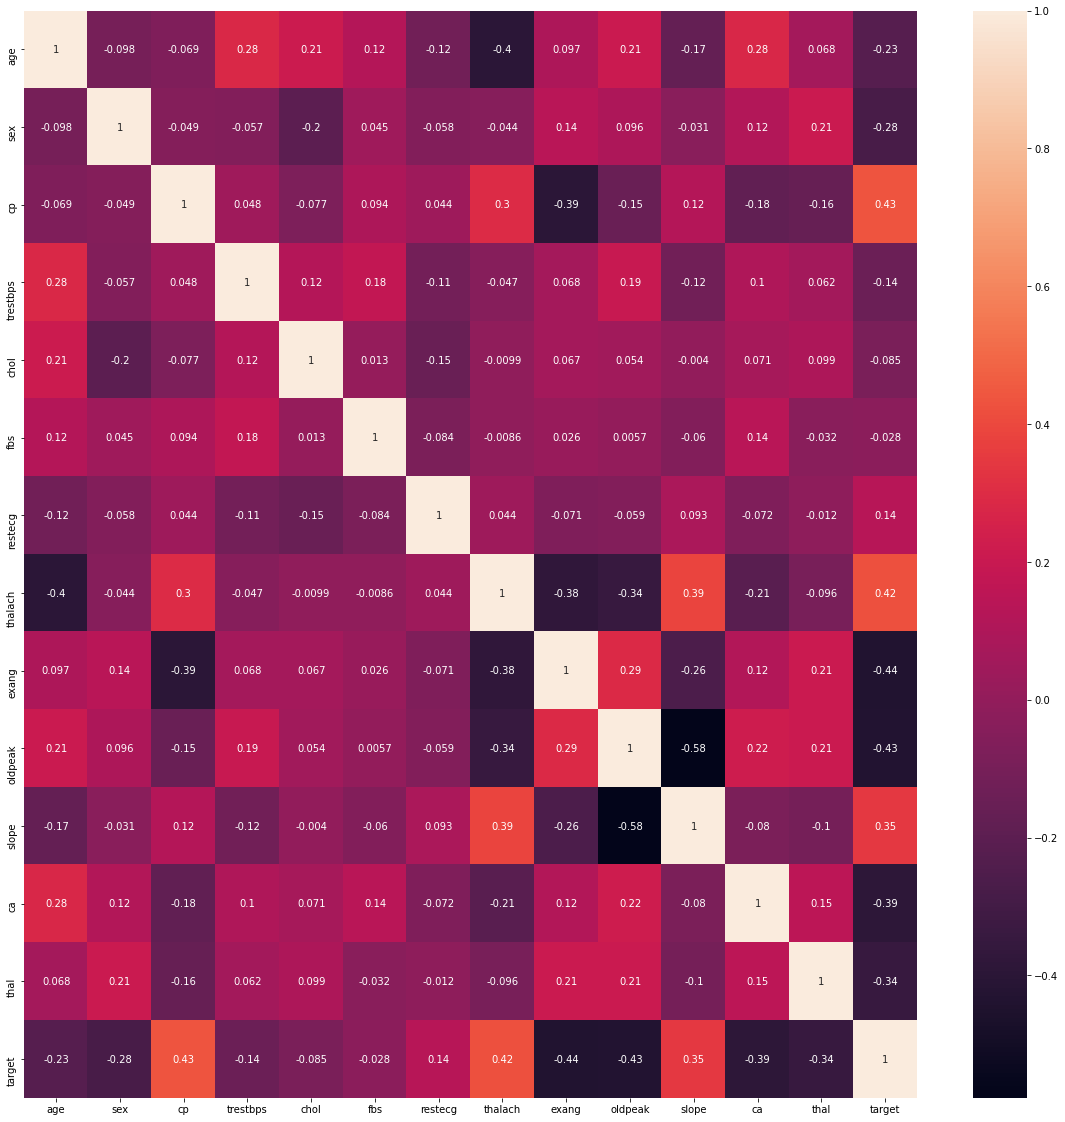

In [14]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
age_l = (df['age']+1).transform(np.log)
trestbps_l = (df['trestbps']+1).transform(np.log)
chol_l = (df['chol']+1).transform(np.log)
thalach_l = (df['thalach']+1).transform(np.log)
oldpeak_l = (df['oldpeak']+1).transform(np.log)

In [17]:
df_new = pd.concat([age_l,df["sex"],
          df["cp"],trestbps_l,
          chol_l, df["fbs"],   
          df["restecg"],thalach_l,
          df["exang"],oldpeak_l,
          df["slope"],df["ca"],
          df["thal"],df["target"]],
           axis=1)

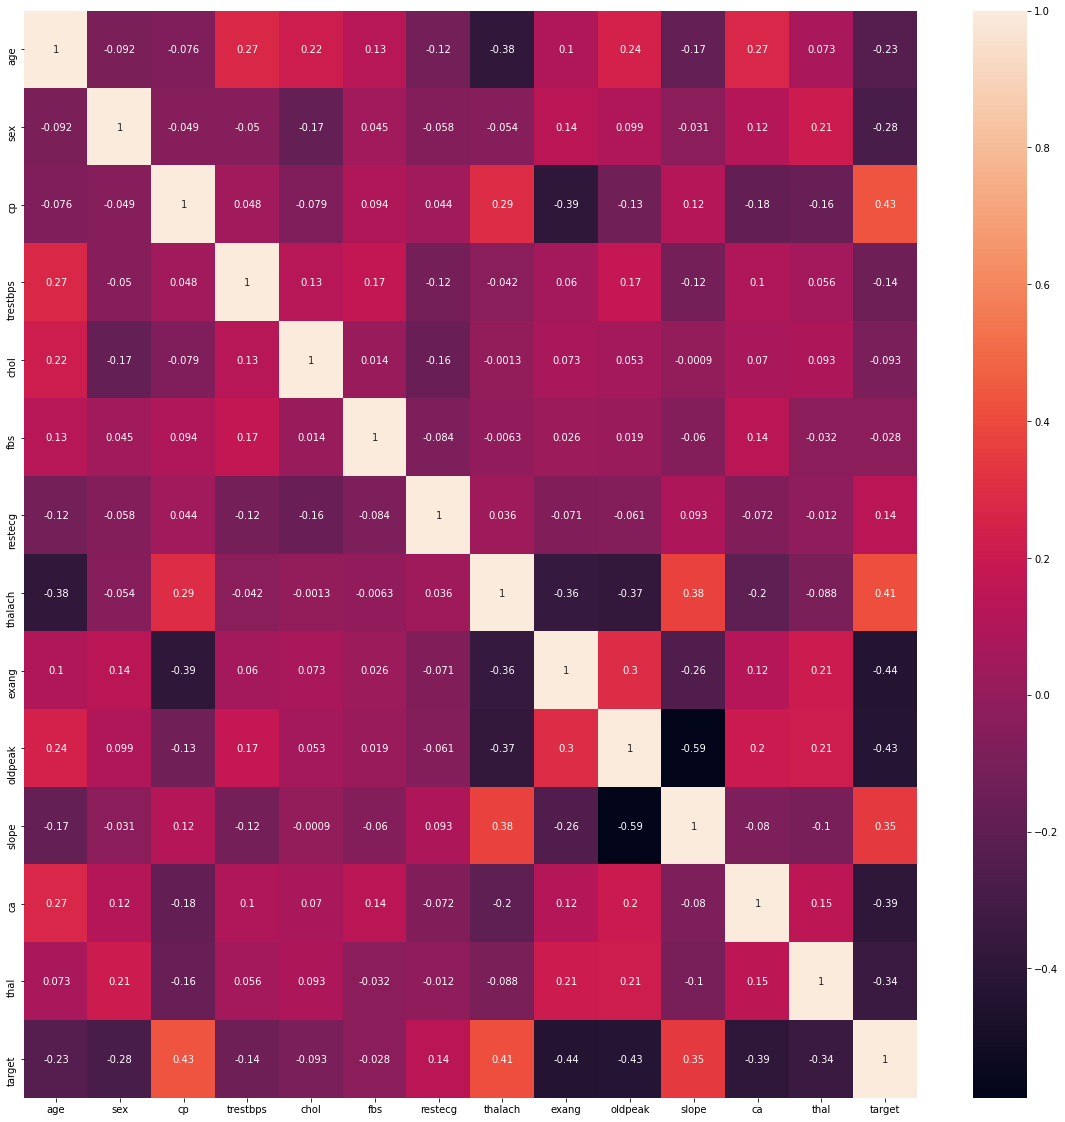

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(df_new.corr(),annot=True)

not using fbs and chol as the correlation is close to 0

In [19]:
df_new = df_new.drop(["fbs","chol"],axis=1)

In [20]:
df_new.describe()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.999769,0.683168,0.966997,4.879093,0.528053,5.002297,0.326733,0.569944,1.399340,0.729373,2.313531,0.544554
std,0.171671,0.466011,1.032052,0.129210,0.525860,0.163532,0.469794,0.524336,0.616226,1.022606,0.612277,0.498835
min,3.401197,0.000000,0.000000,4.553877,0.000000,4.276666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.881511,0.000000,0.000000,4.795791,0.000000,4.901557,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,4.025352,1.000000,1.000000,4.875197,1.000000,5.036953,0.000000,0.587787,1.000000,0.000000,2.000000,1.000000
75%,4.127134,1.000000,2.000000,4.948760,1.000000,5.117994,1.000000,0.955511,2.000000,1.000000,3.000000,1.000000
max,4.356709,1.000000,3.000000,5.303305,2.000000,5.313206,1.000000,1.974081,2.000000,4.000000,3.000000,1.000000


### Classifcation

Recall = TruePositives / (TruePositives + FalseNegatives)  

Precision = TruePositives / (TruePositives + FalsePositives)  

F1 = 2 * (precision * recall) / (precision + recall)  

In [21]:
def classify(clf,vals):
    clf.fit(vals["X_train"],vals["y_train"])
    y_pred = clf.predict(vals["X_test"])
    return round(f1_score(vals["y_test"], y_pred),2)

def classifiers(vals):
    return {
        "AdaBoostClassifier" : classify(AdaBoostClassifier(),vals),
        "GradientBoostingClassifier" : classify(GradientBoostingClassifier(),vals),
        "RandomForestClassifier" : classify(RandomForestClassifier(),vals),
        "GaussianProcessClassifier" : classify(GaussianProcessClassifier(),vals),
        "RidgeClassifierCV" : classify(RidgeClassifierCV(),vals),
        "SGDClassifier" : classify(SGDClassifier(),vals),
        "BernoulliNB" : classify(BernoulliNB(),vals),
        "GaussianNB" : classify(GaussianNB(),vals),
        "KNeighborsClassifier(n_neighbors=5)" : classify(KNeighborsClassifier(n_neighbors=5),vals),
        "LinearSVC" : classify(LinearSVC(),vals),
        "SVC(gamma='auto')" : classify(SVC(gamma='auto'),vals),
        "DecisionTreeClassifier" : classify(DecisionTreeClassifier(),vals),
        "LogisticRegression" : classify(LogisticRegression(),vals)
    }

In [22]:
def predict_for_all(data_frame):
    
    x = data_frame
    x = x.drop("target",axis=1)
    
    y = data_frame["target"]
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state = 42)
    
    scaler = Normalizer()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    all_vals = {
    "X_train":X_train,
    "X_test":X_test,
    "y_train":y_train,
    "y_test":y_test
    }
    
    return sorted(classifiers(all_vals).items(), key=lambda x: x[1], reverse=True)

### Results

In [23]:
predict_for_all(df)

[('GaussianNB', 0.86),
 ('GradientBoostingClassifier', 0.8),
 ('SGDClassifier', 0.8),
 ('BernoulliNB', 0.8),
 ('RandomForestClassifier', 0.79),
 ('GaussianProcessClassifier', 0.78),
 ('LogisticRegression', 0.78),
 ('AdaBoostClassifier', 0.77),
 ('RidgeClassifierCV', 0.77),
 ('LinearSVC', 0.77),
 ('DecisionTreeClassifier', 0.75),
 ("SVC(gamma='auto')", 0.71),
 ('KNeighborsClassifier(n_neighbors=5)', 0.69)]

In [24]:
predict_for_all(df_new)

[('GaussianProcessClassifier', 0.89),
 ('LinearSVC', 0.89),
 ('LogisticRegression', 0.89),
 ('RidgeClassifierCV', 0.86),
 ('GaussianNB', 0.86),
 ('KNeighborsClassifier(n_neighbors=5)', 0.86),
 ("SVC(gamma='auto')", 0.83),
 ('SGDClassifier', 0.82),
 ('AdaBoostClassifier', 0.8),
 ('GradientBoostingClassifier', 0.8),
 ('RandomForestClassifier', 0.8),
 ('BernoulliNB', 0.8),
 ('DecisionTreeClassifier', 0.73)]

After feature engineering, we notice that for all the classifiers, the F1-score tends to increase, attaing a maximum accuracy of **89%**.  
**F1 score** is used instead of confusion matrix for better insigh into model performance as the dataset is imbalanced.